In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/gdrive/MyDrive/data/corona_tested_individuals_ver_0083.english.csv')


In [ ]:

#Import required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---

sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100


In [ ]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,11/12/2020,0,0,0,0,0,negative,No,male,Other
1,11/12/2020,0,1,0,0,0,negative,No,male,Other
2,11/12/2020,0,0,0,0,0,negative,Yes,female,Other
3,11/12/2020,0,0,0,0,0,negative,No,male,Other
4,11/12/2020,0,1,0,0,0,negative,No,male,Contact with confirmed


In [ ]:
df1 = df.copy()
#new_columns = ['TIME','T','SEX','SMOK','DBT','HBP','ANM','AGE','EF','SS','SC','PLTS','CPK']
new_columns = ['TD', 'Cough','Fever','ST', 'SoB', 'Headache', 'COVID', 'Age60', 'Gender', 'TI']
df1.columns = new_columns
df1.head()

,TD,Cough,Fever,ST,SoB,Headache,COVID,Age60,Gender,TI
0,11/12/2020,0,0,0,0,0,negative,No,male,Other
1,11/12/2020,0,1,0,0,0,negative,No,male,Other
2,11/12/2020,0,0,0,0,0,negative,Yes,female,Other
3,11/12/2020,0,0,0,0,0,negative,No,male,Other
4,11/12/2020,0,1,0,0,0,negative,No,male,Contact with confirmed


In [ ]:
for column in df1.columns:
    print(f"Number of unique classes in '{column}': {df1[column].nunique()}")

Number of unique classes in 'TD': 64
Number of unique classes in 'Cough': 2
Number of unique classes in 'Fever': 2
Number of unique classes in 'ST': 2
Number of unique classes in 'SoB': 2
Number of unique classes in 'Headache': 2
Number of unique classes in 'COVID': 3
Number of unique classes in 'Age60': 2
Number of unique classes in 'Gender': 2
Number of unique classes in 'TI': 3


In [ ]:
df1['TI'] = df1['TI'].replace({'Contact with confirmed': 0, 'Abroad': 1, 'Other':2})
df1['TI'].unique()

array([2, 0, 1])

In [ ]:
df1 = df1.loc[df1['COVID'] != 'other']
df1['COVID'].unique()
df1['COVID'] = df1['COVID'].replace({'negative': 0, 'positive': 1})

In [ ]:
df1['Age60'] = df1['Age60'].replace({'No': 0, 'Yes': 1})
df1['Gender'] = df1['Gender'].replace({'male': 0, 'female': 1})

In [ ]:
df1.isnull().sum()

TD              0
Cough           0
Fever           0
ST              0
SoB             0
Headache        0
COVID           0
Age60       50988
Gender       2601
TI              0
dtype: int64

In [ ]:
df1.head()

,TD,Cough,Fever,ST,SoB,Headache,COVID,Age60,Gender,TI
0,11/12/2020,0,0,0,0,0,0,0.0,0.0,2
1,11/12/2020,0,1,0,0,0,0,0.0,0.0,2
2,11/12/2020,0,0,0,0,0,0,1.0,1.0,2
3,11/12/2020,0,0,0,0,0,0,0.0,0.0,2
4,11/12/2020,0,1,0,0,0,0,0.0,0.0,0


In [ ]:
df1.drop(columns=['TD'], inplace=True)
df1.head()

,Cough,Fever,ST,SoB,Headache,COVID,Age60,Gender,TI
0,0,0,0,0,0,0,0.0,0.0,2
1,0,1,0,0,0,0,0.0,0.0,2
2,0,0,0,0,0,0,1.0,1.0,2
3,0,0,0,0,0,0,0.0,0.0,2
4,0,1,0,0,0,0,0.0,0.0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1030724 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Cough     1030724 non-null  int64  
 1   Fever     1030724 non-null  int64  
 2   ST        1030724 non-null  int64  
 3   SoB       1030724 non-null  int64  
 4   Headache  1030724 non-null  int64  
 5   COVID     1030724 non-null  int64  
 6   Age60     979736 non-null   float64
 7   Gender    1028123 non-null  float64
 8   TI        1030724 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 78.6 MB


In [ ]:
counts = df1['COVID'].value_counts()
print(counts)

COVID
0    925290
1    105434
Name: count, dtype: int64


In [ ]:
df1.isnull().sum()

Cough           0
Fever           0
ST              0
SoB             0
Headache        0
COVID           0
Age60       50988
Gender       2601
TI              0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer


# Identify columns with null values
null_cols = df1.columns[df1.isnull().any()]

# Impute null values with mean value
imputer = SimpleImputer(strategy='mean')
df1[null_cols] = imputer.fit_transform(df1[null_cols])

In [ ]:
df1.isnull().sum()

Cough       0
Fever       0
ST          0
SoB         0
Headache    0
COVID       0
Age60       0
Gender      0
TI          0
dtype: int64

In [ ]:
# separating the dependent features
X = df1.drop(['COVID'], axis = 1)
y = df1['COVID']

In [ ]:
# Get the list of feature names
feature_names = list(X.columns)

# Print the list of feature names
print(feature_names)

['Cough', 'Fever', 'ST', 'SoB', 'Headache', 'Age60', 'Gender', 'TI']


**FUE**

In [ ]:
df2=df1.copy()
df2.drop(columns=['Age60'], inplace=True)
df2.head()

,Cough,Fever,ST,SoB,Headache,COVID,Gender,TI
0,0,0,0,0,0,0,0.0,2
1,0,1,0,0,0,0,0.0,2
2,0,0,0,0,0,0,1.0,2
3,0,0,0,0,0,0,0.0,2
4,0,1,0,0,0,0,0.0,0


In [ ]:
# prompt: Apply one hot encoding to df1

df2 = pd.get_dummies(df2, drop_first=True)

In [ ]:
df2.head()

,Cough,Fever,ST,SoB,Headache,COVID,Gender,TI
0,0,0,0,0,0,0,0.0,2
1,0,1,0,0,0,0,0.0,2
2,0,0,0,0,0,0,1.0,2
3,0,0,0,0,0,0,0.0,2
4,0,1,0,0,0,0,0.0,0


In [ ]:
# separating the dependent features
X = df2.drop(['COVID'], axis = 1)
y = df2['COVID']

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# Generate a binary classification dataset


# Print the class distribution before applying SMOTE
print('Class distribution before SMOTE:', Counter(y))

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution after applying SMOTE
print('Class distribution after SMOTE:', Counter(y_resampled))

Class distribution before SMOTE: Counter({0: 925290, 1: 105434})
Class distribution after SMOTE: Counter({0: 925290, 1: 925290})


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**LSVM**

Accuracy of LSVM: 0.916599292408592
Error of LSVM: 0.08340070759140805
Precision of LSVM: 0.7927011666168112
Recall of LSVM: 0.2511054958938724
F1-score of LSVM: 0.38139557197342216
AUC-ROC of LSVM: 0.7692773400267545
Gini Coefficient of LSVM: 0.538554680053509
MCC of LSVM: 0.41690301018123993
Prediction Time of LSVM: 4.029273986816406e-05


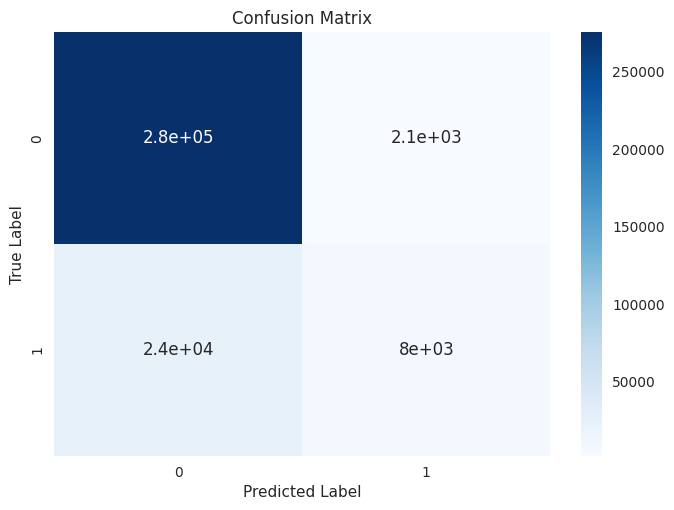

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix

# --- Applying LSVM ---
LSVMclassifier = LinearSVC()
LSVMclassifier.fit(x_train, y_train)

y_pred_LSVM = LSVMclassifier.predict(x_test)

# Calculate evaluation metrics
ac = accuracy_score(y_test, y_pred_LSVM)
error = 1 - ac
precision = precision_score(y_test, y_pred_LSVM)
recall = recall_score(y_test, y_pred_LSVM)
f1 = f1_score(y_test, y_pred_LSVM)
auc_roc = roc_auc_score(y_test, LSVMclassifier.decision_function(x_test))
gini_coeff = (2*auc_roc) - 1

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred_LSVM)

# Print evaluation metrics
print("Accuracy of LSVM:", ac)
print("Error of LSVM:", error)
print("Precision of LSVM:", precision)
print("Recall of LSVM:", recall)
print("F1-score of LSVM:", f1)
print("AUC-ROC of LSVM:", auc_roc)
print("Gini Coefficient of LSVM:", gini_coeff)
print("MCC of LSVM:", mcc)

# Calculate prediction time
import time
start_time = time.time()
p_time = time.time() - start_time
print("Prediction Time of LSVM:", p_time)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_LSVM)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**GradientBoosting with Default paprameter values**

In [ ]:
# --- Applying Gradient Boosting ---
classifierGB = GradientBoostingClassifier()

classifierGB.fit(x_train, y_train)
GBy_pred = classifierGB.predict(x_test)
# Calculate accuracy
acGB = accuracy_score(y_test, GBy_pred)
precisionGB = precision_score(y_test, GBy_pred)
recallGB = recall_score(y_test, GBy_pred)
f1GB = f1_score(y_test, GBy_pred)
auc_rocGB = roc_auc_score(y_test, GBy_pred)
gini_coeff = (2*auc_roc) - 1

print("Accuracy of GB:", acGB)
print("Precision of GB:", precisionGB)
print("Recall of GB:", recallGB)
print("F1-score of GB:", f1GB)
print("AUC-ROC of GB:", auc_rocGB)
print("Gini Coefficient of GB:", gini_coeff)
# Calculate MCC
mccGB = matthews_corrcoef(y_test, GBy_pred)
print("MCC of GB:", mccGB)

# Calculate prediction time
import time
start_time = time.time()

p_timeGB = time.time() - start_time
print("Prediction Time:", p_timeGB)

Accuracy of GB: 0.9203474571338021
Precision of GB: 0.7696379257440933
Recall of GB: 0.31689829437776373
F1-score of GB: 0.4489439770896725
AUC-ROC of GB: 0.653039467049956
Gini Coefficient of GB: 0.538554680053509
MCC of GB: 0.46175782487335626
Prediction Time: 6.031990051269531e-05


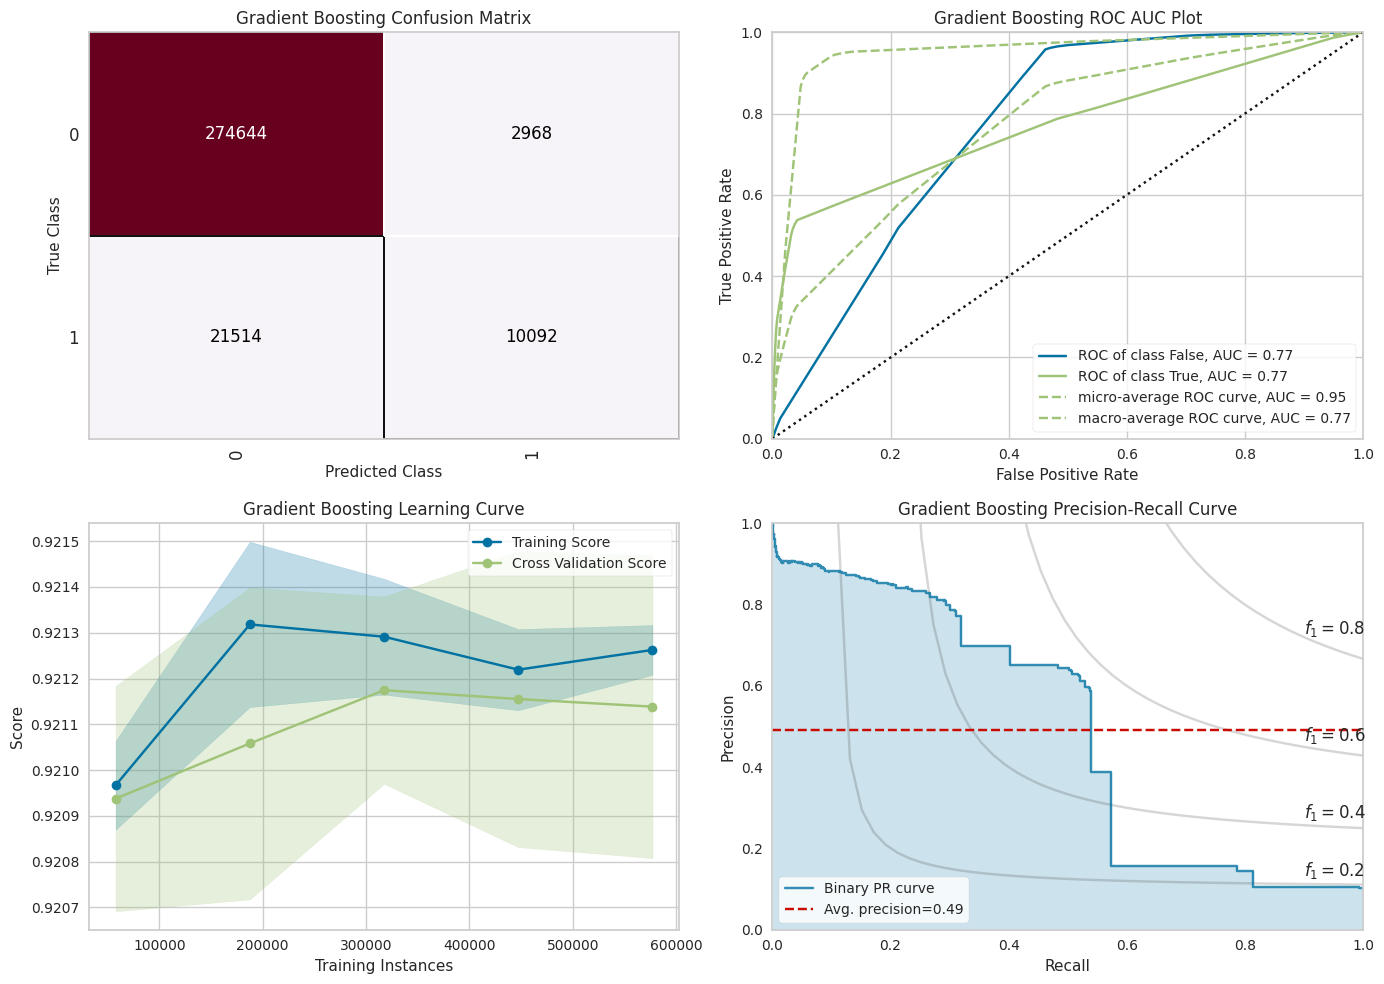

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(classifierGB, ax=ax1, cmap='PuRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(x_train, y_train)
gbcmatrix.score(x_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(classifierGB, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(x_train, y_train)
gbcrocauc.score(x_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(classifierGB, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(x_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(classifierGB, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(x_train, y_train)
gbcurve.score(x_test, y_test)
gbcurve.finalize()

plt.tight_layout();

**LR**

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred_logreg = logreg.predict(x_test)

# Calculate evaluation metrics
ac = accuracy_score(y_test, y_pred_logreg)
error = 1 - ac
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
auc_roc = roc_auc_score(y_test, logreg.decision_function(x_test))
gini_coeff = (2*auc_roc) - 1

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred_logreg)

# Print evaluation metrics
print("Accuracy of LR:", ac)
print("Error of LR:", error)
print("Precision of LR:", precision)
print("Recall of LR:", recall)
print("F1-score of LR:", f1)
print("AUC-ROC of LR:", auc_roc)
print("Gini Coefficient of LR:", gini_coeff)
print("MCC of LR:", mcc)

# Calculate prediction time
import time
start_time = time.time()
p_time = time.time() - start_time
print("Prediction Time of logreg:", p_time)

Accuracy of LR: 0.9169388586692884
Error of LR: 0.08306114133071163
Precision of LR: 0.7785754242028715
Recall of LR: 0.26377132027795325
F1-score of LR: 0.3940452036049639
AUC-ROC of LR: 0.7691970054489804
Gini Coefficient of LR: 0.5383940108979608
MCC of LR: 0.42281707377435784
Prediction Time of logreg: 3.790855407714844e-05


**Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

#Instantiate AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100)

#Fit the classifier to the training data
adaboost.fit(x_train, y_train)

#Predict the labels for the test data
y_pred_adaboost = adaboost.predict(x_test)

#Calculate evaluation metrics
ac = accuracy_score(y_test, y_pred_adaboost)
error = 1 - ac
precision = precision_score(y_test, y_pred_adaboost)
recall = recall_score(y_test, y_pred_adaboost)
f1 = f1_score(y_test, y_pred_adaboost)
auc_roc = roc_auc_score(y_test, adaboost.predict_proba(x_test)[:, 1])
gini_coeff = (2 * auc_roc) - 1

#Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred_adaboost)

#Print evaluation metrics
print("Accuracy of AdaBoost:", ac)
print("Error of AdaBoost:", error)
print("Precision of AdaBoost:", precision)
print("Recall of AdaBoost:", recall)
print("F1-score of AdaBoost:", f1)
print("AUC-ROC of AdaBoost:", auc_roc)
print("Gini Coefficient of AdaBoost:", gini_coeff)
print("MCC of AdaBoost:", mcc)

#Calculate prediction time
import time
start_time = time.time()
p_time = time.time() - start_time
print("Prediction Time of AdaBoost:", p_time)

Accuracy of AdaBoost: 0.9159104579940366
Error of AdaBoost: 0.08408954200596341
Precision of AdaBoost: 0.792554291623578
Recall of AdaBoost: 0.24207201516108653
F1-score of AdaBoost: 0.37086861843697067
AUC-ROC of AdaBoost: 0.7687904379294235
Gini Coefficient of AdaBoost: 0.537580875858847
MCC of AdaBoost: 0.409040808852163
Prediction Time of AdaBoost: 3.528594970703125e-05
